In [5]:
import csv
import pandas as pd
import numpy as np
import glob
import matplotlib
import scipy as sp
from matplotlib import pyplot as plt
from itertools import cycle, islice
from scipy import stats

import seaborn as sns

In [6]:
def organize_trial_by_trial(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"game", 1:"trial", 2:"player", 3:"hole", 4:"probability", 5:"reward", 6:"time", 7:"P1 score", 8:"P2 score"})
    df = df[40:]
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    #df = df.drop(columns = 'reward') #can comment this out if want to look at time
    df = df.drop(['reward', 'time'], axis=1)
    df = df.apply(pd.to_numeric)
    df.head()
    
    return df

In [7]:
def organize_trial_by_trial_floatclick(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"type", 1:"game", 2:"trial", 3:"player", 4:"hole", 5:"probability", 6:"P1 score", 7:"P2 score", 8:""})
    df = df[40:]
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.drop(['type'], axis=1)
    df = df.apply(pd.to_numeric)
    df.head()
    
    return df

In [8]:
def get_score(df, player_number, game_number):
    if game_number == 1:
        row = 199
    elif game_number == 2:
        row = 399
    if player_number == 1:
        column = 'P1 score'
    elif player_number == 2:
        column = 'P2 score'
    score = df.loc[row, column]
    return score

In [9]:
#create a dataframes for scores
scores = pd.DataFrame(columns=['c_g1','c_g2','m_g1','m_g2'])

In [10]:
#version is 'c' for single player and 'm' for multi
def call_get_score(df, version):
    p1_g1 = get_score(df, 1, 1)
    p1_g2 = get_score(df, 1, 2)
    p1_score_diff = p1_g2 - p1_g1
    if version == 'm':
        p1_g1 = get_score(df, 1, 1)
        p1_g2 = get_score(df, 1, 2)
        p1_score_diff = p1_g2 - p1_g1
        p2_g1 = get_score(df, 2, 1)
        p2_g2 = get_score(df, 2, 2)
        p2_score_diff = p2_g2 - p2_g1
        return p1_g1, p1_g2, p2_g1, p2_g2, p1_score_diff, p2_score_diff
    return p1_g1, p1_g2, p1_score_diff

In [11]:
#separate data frames for p1 and p2 
def separate_df(df, version):
    #df.set_index(df['trial'])
    df_p1 = df[df['player'] == 1]
    df_p1_g1 = df_p1[df['game number'] == 1]
    df_p1_g2 = df_p1[df['game number'] == 2]
    #remove first 20 trials for g2
    df_p1_g2 = df_p1_g2[20:]
    if version == 'c':
        return df_p1_g1, df_p1_g2
    df_p2 = df[df['player'] ==2 ]
    df_p2_g1 = df_p2[df['game number'] == 1]
    df_p2_g2 = df_p2[df['game number'] == 2]
    return df_p1_g1, df_p1_g2, df_p2_g1, df_p2_g2

In [12]:
#needs work
def call_call_get_score(df, version):
    p1_g1 = df+'_'+'p1_'+'g1_'+'score'
    p1_g2 = df+'_'+'p1_'+'g2_'+'score'
    p2_g1 = df+'_'+'p2_'+'g1_'+'score'
    p2_g2 = df+'_'+'p2_'+'g2_'+'score'
    p1_g1, p1_g2, p2_g1, p2_g2 = call_get_score(df, version)
    return p1_g1, p1_g2, p2_g1, p2_g2

# Single Player Analysis

In [39]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c02_gamedata.csv')
c02 = df
c02_p1_g1_score,c02_p1_g2_score,c02_score_diff = call_get_score(c02, 'c')
c02.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,21,1,3,60,15,18
41,1,21,2,1,90,15,19
42,1,22,1,1,90,16,19
43,1,22,2,1,90,16,20
44,1,23,1,3,60,16,20


In [10]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c03_gamedata.csv')
c03 = df
c03_p1_g1_score,c03_p1_g2_score,c03_score_diff = call_get_score(c03, 'c')
c03.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,21,1,3,90,11,6
41,1,21,2,3,30,11,6
42,1,22,1,3,90,12,6
43,1,22,2,3,30,12,7
44,1,23,1,3,90,13,7


In [11]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c04_gamedata.csv')
c04 = df
c04_p1_g1_score,c04_p1_g2_score,c04_score_diff = call_get_score(c04, 'c')
c04.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,21,1,3,90,11,6
41,1,21,2,3,30,11,6
42,1,22,1,3,90,12,6
43,1,22,2,3,30,12,7
44,1,23,1,3,90,13,7


In [12]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c05_gamedata.csv')
c05 = df
c05_p1_g1_score,c05_p1_g2_score,c05_score_diff = call_get_score(c05, 'c')
c05.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,21,1,3,90,13,6
41,1,21,2,3,30,13,7
42,1,22,1,1,30,13,7
43,1,22,2,3,30,13,7
44,1,23,1,2,60,14,7


In [13]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c06_gamedata.csv')
c06 = df
c06_p1_g1_score,c06_p1_g2_score,c06_score_diff = call_get_score(c06, 'c')
c06.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,21,1,2,90,12,4
41,1,21,2,3,30,12,4
42,1,22,1,2,90,13,4
43,1,22,2,3,30,13,5
44,1,23,1,3,60,13,5


In [14]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c09_gamedata.csv')
c09 = df
c09_p1_g1_score,c09_p1_g2_score,c09_score_diff = call_get_score(c09, 'c')
c09.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,21,1,3,60,15,16
41,1,21,2,1,90,15,17
42,1,22,1,1,90,16,17
43,1,22,2,1,90,16,18
44,1,23,1,3,60,17,18


In [15]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c10_gamedata.csv')
c10 = df
c10_p1_g1_score,c10_p1_g2_score,c10_score_diff = call_get_score(c10, 'c')
c10.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,21,1,3,30,13,20
41,1,21,2,1,90,13,21
42,1,22,1,1,90,14,21
43,1,22,2,1,90,14,22
44,1,23,1,1,90,15,22


In [16]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c11_gamedata.csv')
c11 = df
c11_p1_g1_score,c11_p1_g2_score,c11_score_diff = call_get_score(c11, 'c')
c11.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,21,1,1,60,10,10
41,1,21,2,2,60,10,11
42,1,22,1,3,30,10,11
43,1,22,2,2,60,10,11
44,1,23,1,1,60,11,11


In [17]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/c12_gamedata.csv')
c12 = df
c12_p1_g1_score,c12_p1_g2_score,c12_score_diff = call_get_score(c12, 'c')
c12.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,40,1,3,30,14,14
41,1,41,2,0,90,14,14
42,1,42,1,2,60,14,15
43,1,43,2,0,90,15,15
44,1,44,1,2,60,15,16


In [18]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/c13_gamedata.csv')
c13 = df
c13_p1_g1_score,c13_p1_g2_score,c13_score_diff = call_get_score(c13, 'c')
c13.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,40,1,2,60,10,16
41,1,41,2,0,60,10,16
42,1,42,1,3,30,10,17
43,1,43,2,0,60,11,17
44,1,44,1,2,60,11,17


In [19]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/c14_gamedata.csv')
c14 = df
c14_p1_g1_score,c14_p1_g2_score,c14_score_diff = call_get_score(c14, 'c')
c14.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,40,1,1,90,10,1
41,1,41,2,0,30,11,1
42,1,42,1,1,90,11,1
43,1,43,2,0,30,12,1
44,1,44,1,1,90,12,1


In [20]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/c16_gamedata.csv')
c16 = df
c16_p1_g1_score,c16_p1_g2_score,c16_score_diff = call_get_score(c16, 'c')
c12.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,40,1,3,30,14,14
41,1,41,2,0,90,14,14
42,1,42,1,2,60,14,15
43,1,43,2,0,90,15,15
44,1,44,1,2,60,15,16


In [21]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/c17_gamedata.csv')
c17 = df
c17_p1_g1_score,c17_p1_g2_score,c17_score_diff = call_get_score(c17, 'c')
c17.head()#in the s files, p2 is the confederate


,game,trial,player,hole,probability,P1 score,P2 score
40,1,40,1,1,90,16,9
41,1,41,2,0,60,17,9
42,1,42,1,1,90,17,10
43,1,43,2,0,60,18,10
44,1,44,1,1,90,18,10


# Multi Player Analysis

In [40]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/m05_gamedata.csv')
m05 = df
m05_p1_g1_score,m05_p1_g2_score,m05_p2_g1_score,m05_p2_g2_score,m05_p1_score_diff,m05_p2_score_diff = call_get_score(m05, 'm')
m05.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,21,1,2,60,16,14
41,1,21,2,3,90,16,15
42,1,22,1,1,90,17,15
43,1,22,2,2,60,17,16
44,1,23,1,1,90,18,16


In [41]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/m06_gamedata.csv')
m06 = df
m06_p1_g1_score,m06_p1_g2_score,m06_p2_g1_score,m06_p2_g2_score,m06_p1_score_diff,m06_p2_score_diff = call_get_score(m06, 'm')
m06.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,40,1,2,60,11,13
41,1,41,2,1,90,11,13
42,1,42,1,3,30,11,14
43,1,43,2,2,30,11,14
44,1,44,1,1,90,11,14


In [13]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/m08_gamedata.csv')
m08 = df
m08_p1_g1_score,m08_p1_g2_score,m08_p2_g1_score,m08_p2_g2_score,m08_p1_score_diff,m08_p2_score_diff = call_get_score(m08, 'm')
m08.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,40,1,1,90,10,13
41,1,41,2,3,90,11,13
42,1,42,1,1,90,11,14
43,1,43,2,3,90,12,14
44,1,44,1,1,90,12,15


In [15]:
#df = organize_trial_by_trial_floatclick('data/m09_gamedata.csv')
#m09 = df
#m09_p1_g1_score,m09_p1_g2_score,m09_p2_g1_score,m09_p2_g2_score,m09_p1_score_diff,m09_p2_score_diff = call_get_score(m09, 'm')
#m09.head()

In [44]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/m10_gamedata.csv')
m10 = df
m10_p1_g1_score,m10_p1_g2_score,m10_p2_g1_score,m10_p2_g2_score,m10_p1_score_diff,m10_p2_score_diff = call_get_score(m10, 'm')
m10.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,40,1,3,30,16,10
41,1,41,2,1,30,16,10
42,1,42,1,1,90,16,10
43,1,43,2,2,60,17,10
44,1,44,1,3,30,17,10


In [45]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/m11_gamedata.csv')
m11 = df
m11_p1_g1_score,m11_p1_g2_score,m11_p2_g1_score,m11_p2_g2_score,m11_p1_score_diff,m11_p2_score_diff = call_get_score(m11, 'm')
m11.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,40,1,3,30,9,16
41,1,41,2,3,90,9,16
42,1,42,1,3,30,9,17
43,1,43,2,3,90,10,17
44,1,44,1,3,30,10,18


In [17]:
#in the s files, p2 is the confederate
#df = organize_trial_by_trial_floatclick('data/m12_gamedata.csv')
#m12 = df
#m12_p1_g1_score,m12_p1_g2_score,m12_p2_g1_score,m12_p2_g2_score,m12_p1_score_diff,m12_p2_score_diff = call_get_score(m12, 'm')
#m12.head()

In [47]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/m13_gamedata.csv')
m13 = df
m13_p1_g1_score,m13_p1_g2_score,m13_p2_g1_score,m13_p2_g2_score,m13_p1_score_diff,m13_p2_score_diff = call_get_score(m13, 'm')
m13.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,40,1,3,30,10,14
41,1,41,2,3,90,10,14
42,1,42,1,2,60,10,15
43,1,43,2,2,60,11,15
44,1,44,1,3,30,11,16


In [395]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/m14_gamedata.csv')
m14 = df
m14_p1_g1_score,m14_p1_g2_score,m14_p2_g1_score,m14_p2_g2_score,m14_p1_score_diff,m14_p2_score_diff = call_get_score(m14, 'm')
m14.head()

,game,trial,player,hole,probability,P1 score,P2 score
40,1,40,1,3,30,17,11
41,1,41,2,1,30,17,11
42,1,42,1,1,90,17,11
43,1,43,2,1,30,18,11
44,1,44,1,1,90,18,11


# Confederate score diff between G1 and G2

In [31]:
score_diff_confederate = pd.DataFrame({'participant':['c02', 'c03', 
                               'c04', 'c05', 'c06', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c16', 'c17'], 'score_diff_confederate':
     [c02_score_diff, c03_score_diff, c04_score_diff,
      c05_score_diff, c06_score_diff, c09_score_diff, c10_score_diff, c11_score_diff, c12_score_diff, c13_score_diff, c14_score_diff, c16_score_diff, c17_score_diff ]})

# Multi score diff between G1 and G2 (p1)

In [396]:
p1_score_diff_multi = pd.DataFrame({'participant':[ 'm05', 'm06', 'm08', 'm10', 'm11', 'm13', 'm14'], 'p1_score_diff_multi':
     [m05_p1_score_diff, m06_p1_score_diff, m08_p1_score_diff, m10_p1_score_diff, m11_p1_score_diff, m13_p1_score_diff, m14_p1_score_diff]})

# Multi score diff between G1 and G2 (p2)

In [397]:
p2_score_diff_multi = pd.DataFrame({'participant':[ 'm05', 'm06', 'm08', 'm10', 'm11', 'm13', 'm14'], 'p2_score_diff_multi':
     [m05_p2_score_diff, m06_p2_score_diff, m08_p2_score_diff, m10_p2_score_diff, m11_p2_score_diff, m13_p2_score_diff, m14_p2_score_diff]})

# Score difference confederate:

In [57]:
score_diff_confederate

,participant,score_diff_confederate
0,c02,11
1,c03,-6
2,c04,-6
3,c05,11
4,c06,-6
5,c09,-17
6,c10,-2
7,c11,13
8,c12,-6
9,c13,4


In [58]:
score_diff_confederate_mean = score_diff_confederate['score_diff_confederate'].mean()

In [60]:
#score_diff_ex_mean = score_diff_confederate_ex['score_diff_confederate'].mean()

In [61]:
score_diff_confederate_mean

-1.3076923076923077

In [ ]:
#score_diff_ex_mean

# Score difference multi (p1):

In [398]:
p1_score_diff_multi

,participant,p1_score_diff_multi
0,m05,-18
1,m06,5
2,m08,11
3,m10,-3
4,m11,3
5,m13,15
6,m14,-21


In [399]:
p1_score_diff_multi_mean = p1_score_diff_multi['p1_score_diff_multi'].mean()

In [400]:
p1_score_diff_multi_mean

-1.1428571428571428

# Score difference multi (p2):

In [401]:
p2_score_diff_multi

,participant,p2_score_diff_multi
0,m05,11
1,m06,-3
2,m08,6
3,m10,5
4,m11,1
5,m13,13
6,m14,-6


In [402]:
p2_score_diff_multi_mean = p2_score_diff_multi['p2_score_diff_multi'].mean()

In [403]:
p2_score_diff_multi_mean

3.857142857142857

# Confederate scores in G1 and G2

In [404]:
c_scores_1 = pd.DataFrame({'participant':['c02', 'c03', 
                               'c04', 'c05', 'c06', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c16', 'c17'], 'confederate_score_1':
     [c02_p1_g1_score, c03_p1_g1_score, c04_p1_g1_score,
      c05_p1_g1_score, c06_p1_g1_score, c09_p1_g1_score, c10_p1_g1_score, c11_p1_g1_score, c12_p1_g1_score, c13_p1_g1_score, c14_p1_g1_score, c16_p1_g1_score, c17_p1_g1_score]})
#c_scores_1.set_index('participant', inplace=True, drop=True)
c_scores_1

,participant,confederate_score_1
0,c02,74
1,c03,79
2,c04,79
3,c05,61
4,c06,59
5,c09,61
6,c10,81
7,c11,69
8,c12,59
9,c13,64


In [203]:
c_scores_2 = pd.DataFrame({'participant':['c02', 'c03', 
                               'c04', 'c05', 'c06', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c16', 'c17'], 'confederate_score_2':[c02_p1_g2_score, c03_p1_g2_score, c04_p1_g2_score, c05_p1_g2_score, c06_p1_g2_score, c09_p1_g2_score, c10_p1_g2_score, c11_p1_g2_score, c12_p1_g2_score, c13_p1_g2_score, c14_p1_g2_score, c16_p1_g2_score, c17_p1_g2_score]})
#c_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)
c_scores_2

,participant,confederate_score_2
0,c02,85
1,c03,73
2,c04,73
3,c05,72
4,c06,53
5,c09,44
6,c10,79
7,c11,82
8,c12,53
9,c13,68


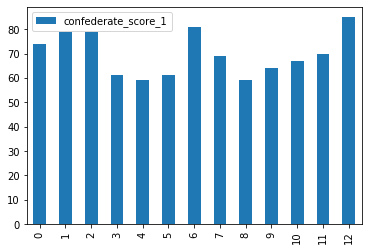

In [205]:
c_scores_1_bar = c_scores_1.plot.bar()

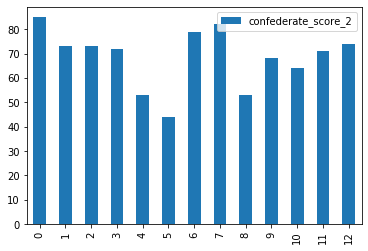

In [206]:
c_scores_2_bar = c_scores_2.plot.bar()

In [207]:
c_scores = pd.merge(c_scores_1, c_scores_2, on = 'participant')

In [208]:
c_scores.columns=['participant','Game 1','Game 2']
c_scores.set_index('participant', inplace=True, drop=True)

In [209]:
c_scores

,Game 1,Game 2
participant,,
c02,74,85
c03,79,73
c04,79,73
c05,61,72
c06,59,53
c09,61,44
c10,81,79
c11,69,82
c12,59,53


([<matplotlib.axis.YTick at 0x1a23a3d710>,
 <a list of 6 Text yticklabel objects>)

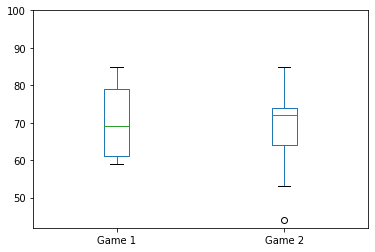

In [210]:
c_scores_box = c_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

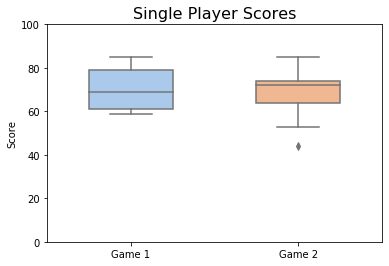

In [211]:
c_scores_box = sns.boxplot( 
                 data=c_scores, 
                 width=0.5,
                 palette="pastel")
c_scores_box.axes.set_title("Single Player Scores",
                    fontsize=16)

plot_file_name="c_score_box.jpg"
 
plt.ylim(0, 100)
c_scores_box.axes.set(ylabel='Score')

# save as jpeg
c_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [212]:
c_scores_p = sp.stats.ttest_rel(c_scores['Game 1'],c_scores['Game 2'])

In [213]:
c_scores_p

Ttest_relResult(statistic=0.523676343611033, pvalue=0.610039012959148)

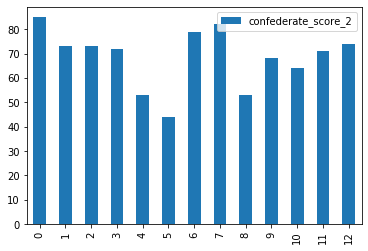

In [214]:
c_scores_2_bar = c_scores_2.plot.bar()

In [217]:
#combine g1 and g2 to one dataframe
c_combo = c_scores_1.append(c_scores_2)

In [218]:
'''c_combo = pd.DataFrame({'participant':['c02','c02','c03','c03','c04','c04','c05','c05',
                                'c06','c06','c09','c09','c10','c10','c11','c11','c12','c12',
                                'c13','c13','c14','c14','c16','c16','c17','c17'], 'score':
[c02_p1_g1_score, c02_p1_g2_score, c03_p1_g1_score, c03_p1_g2_score, c04_p1_g1_score, c04_p1_g2_score, c05_p1_g1_score, c05_p1_g2_score, c06_p1_g1_score, c06_p1_g2_score, c09_p1_g1_score, c09_p1_g2_score, c10_p1_g1_score, c10_p1_g2_score, c11_p1_g1_score, c11_p1_g2_score, c12_p1_g1_score, c12_p1_g2_score, c13_p1_g1_score, c13_p1_g2_score, c14_p1_g1_score, c14_p1_g2_score, c16_p1_g1_score, c16_p1_g2_score, c17_p1_g1_score, c17_p1_g2_score]})
c_combo.set_index('participant', inplace=True, drop=True)'''

"c_combo = pd.DataFrame({'participant':['c02','c02','c03','c03','c04','c04','c05','c05',\n                                'c06','c06','c09','c09','c10','c10','c11','c11','c12','c12',\n                                'c13','c13','c14','c14','c16','c16','c17','c17'], 'score':\n[c02_p1_g1_score, c02_p1_g2_score, c03_p1_g1_score, c03_p1_g2_score, c04_p1_g1_score, c04_p1_g2_score, c05_p1_g1_score, c05_p1_g2_score, c06_p1_g1_score, c06_p1_g2_score, c09_p1_g1_score, c09_p1_g2_score, c10_p1_g1_score, c10_p1_g2_score, c11_p1_g1_score, c11_p1_g2_score, c12_p1_g1_score, c12_p1_g2_score, c13_p1_g1_score, c13_p1_g2_score, c14_p1_g1_score, c14_p1_g2_score, c16_p1_g1_score, c16_p1_g2_score, c17_p1_g1_score, c17_p1_g2_score]})\nc_combo.set_index('participant', inplace=True, drop=True)"

In [219]:
#new_index = ('c02_g1','c02_g2','c03_g1','c03_g2','c04_g1','c04_g2','c05_g1','c05_g2','c06_g1','c06_g2','c09_g1','c09_g2','c10_g1','c10_g2','c11_g1','c11_g2','c12_g1','c12_g2','c13_g1','c13_g2','c14_g1','c14_g2','c16_g1','c16_g2','c17_g1','c17_g2')
#c_combo.index = new_index

In [220]:
c_combo

,confederate_score_1,confederate_score_2,participant
0,74.0,NaN,c02
1,79.0,NaN,c03
2,79.0,NaN,c04
3,61.0,NaN,c05
4,59.0,NaN,c06
5,61.0,NaN,c09
6,81.0,NaN,c10
7,69.0,NaN,c11
8,59.0,NaN,c12
9,64.0,NaN,c13


In [221]:
c_combo = c_combo.sort_values(by=['participant'])

In [222]:
c_combo

,confederate_score_1,confederate_score_2,participant
0,74.0,NaN,c02
0,NaN,85.0,c02
1,79.0,NaN,c03
1,NaN,73.0,c03
2,79.0,NaN,c04
2,NaN,73.0,c04
3,61.0,NaN,c05
3,NaN,72.0,c05
4,59.0,NaN,c06
4,NaN,53.0,c06


In [186]:
#need to make g1 and g2 bars diff colors
#colors = list(islice(cycle(['red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue']),None,len(c_combo)))
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
#c_combo_bar = c_combo.plot(kind='bar',color=colors)

In [223]:
c_scores_1_mean = c_scores_1.mean()

In [224]:
c_scores_1_mean

confederate_score_1    69.846154
dtype: float64

In [225]:
c_scores_1_std = c_scores_1.std()

In [226]:
c_scores_1_std

confederate_score_1    9.007831
dtype: float64

In [227]:
c_scores_2_mean = c_scores_2.mean()

In [228]:
c_scores_2_mean

confederate_score_2    68.538462
dtype: float64

In [229]:
c_scores_2_std = c_scores_2.std()

In [230]:
c_scores_2_std

confederate_score_2    12.094182
dtype: float64

In [ ]:
#does everyone do better in the second game? 
#does the player that did better in the first game always do better in the second game?

# Multi scores in G1 and G2 (p1)

In [407]:
mp1_scores_1 = pd.DataFrame({'participant':['m05', 'm06', 'm08', 'm10', 'm11', 'm13', 'm14'], 'mp1_score_1':
     [m05_p1_g1_score, m06_p1_g1_score, m08_p1_g1_score,
      m10_p1_g1_score, m11_p1_g1_score, m13_p1_g1_score, m14_p1_g1_score]})
#mp1_scores_1.set_index('participant', inplace=True, drop=True)
mp1_scores_1

,participant,mp1_score_1
0,m05,86
1,m06,57
2,m08,69
3,m10,69
4,m11,80
5,m13,53
6,m14,75


In [408]:
mp1_scores_2 = pd.DataFrame({'participant':['m05', 'm06', 'm08', 'm10', 'm11', 'm13', 'm14'], 'mp1_score_2':
     [m05_p1_g2_score, m06_p1_g2_score, m08_p1_g2_score,
      m10_p1_g2_score, m11_p1_g2_score, m13_p1_g2_score, m14_p1_g2_score]})
#mp1_scores_2.set_index('participant', inplace=True, drop=True)
mp1_scores_2

,participant,mp1_score_2
0,m05,68
1,m06,62
2,m08,80
3,m10,66
4,m11,83
5,m13,68
6,m14,54


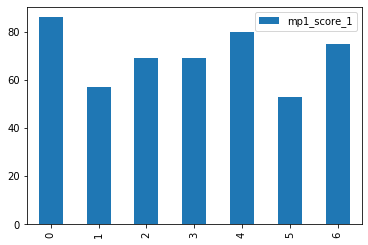

In [409]:
mp1_scores_1_bar = mp1_scores_1.plot.bar()

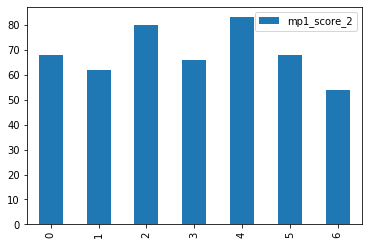

In [410]:
mp1_scores_2_bar = mp1_scores_2.plot.bar()

In [411]:
mp1_scores = pd.merge(mp1_scores_1, mp1_scores_2, on = 'participant')

In [412]:
mp1_scores.columns=['participant','Game 1','Game 2']
mp1_scores.set_index('participant', inplace=True, drop=True)

In [413]:
mp1_scores

,Game 1,Game 2
participant,,
m05,86,68
m06,57,62
m08,69,80
m10,69,66
m11,80,83
m13,53,68
m14,75,54


([<matplotlib.axis.YTick at 0x1a23e17150>,
 <a list of 6 Text yticklabel objects>)

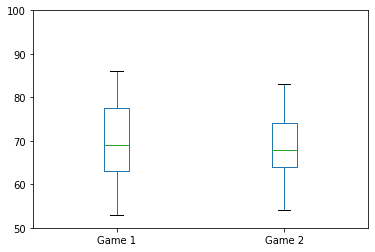

In [414]:
mp1_scores_box = mp1_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

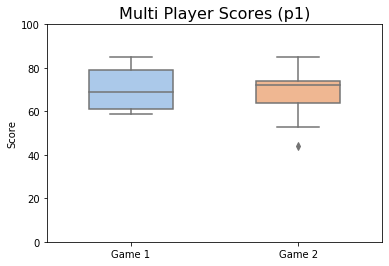

In [415]:
mp1_scores_box = sns.boxplot( 
                 data=c_scores, 
                 width=0.5,
                 palette="pastel")
mp1_scores_box.axes.set_title("Multi Player Scores (p1)",
                    fontsize=16)

plot_file_name="mp1_score_box.jpg"
 
plt.ylim(0, 100)
mp1_scores_box.axes.set(ylabel='Score')

# save as jpeg
mp1_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [416]:
mp1_scores_p = sp.stats.ttest_rel(mp1_scores['Game 1'],mp1_scores['Game 2'])

In [417]:
mp1_scores_p

Ttest_relResult(statistic=0.21889757135061913, pvalue=0.8339859424240292)

In [420]:
#combine g1 and g2 to one dataframe
mp1_combo = mp1_scores_1.append(mp1_scores_2)

In [421]:
'''mp1_combo = pd.DataFrame({'participant':['m05', 'm05','m06', 'm06', 'm08', 'm08', 'm10', 'm10', 'm11', 'm11', 'm13', 'm13', 'm14', 'm14'], 'score':
[m05_p1_g1_score, m05_p1_g2_score, m06_p1_g1_score, m06_p1_g2_score, m08_p1_g1_score, m08_p1_g2_score, m10_p1_g1_score, m10_p1_g2_score, m11_p1_g1_score, m11_p1_g2_score, m13_p1_g1_score, m13_p1_g2_score, m14_p1_g1_score, m14_p1_g2_score]})'''

"mp1_combo = pd.DataFrame({'participant':['m05', 'm05','m06', 'm06', 'm08', 'm08', 'm10', 'm10', 'm11', 'm11', 'm13', 'm13', 'm14', 'm14'], 'score':\n[m05_p1_g1_score, m05_p1_g2_score, m06_p1_g1_score, m06_p1_g2_score, m08_p1_g1_score, m08_p1_g2_score, m10_p1_g1_score, m10_p1_g2_score, m11_p1_g1_score, m11_p1_g2_score, m13_p1_g1_score, m13_p1_g2_score, m14_p1_g1_score, m14_p1_g2_score]})"

In [422]:
mp1_combo.set_index('participant', inplace=True, drop=True)

In [423]:
#new_index = ('c02_g1','c02_g2','c03_g1','c03_g2','c04_g1','c04_g2','c05_g1','c05_g2','c06_g1','c06_g2','c09_g1','c09_g2','c10_g1','c10_g2','c11_g1','c11_g2','c12_g1','c12_g2','c13_g1','c13_g2','c14_g1','c14_g2','c16_g1','c16_g2','c17_g1','c17_g2')
#c_combo.index = new_index

In [424]:
mp1_combo

,mp1_score_1,mp1_score_2
participant,,
m05,86.0,NaN
m06,57.0,NaN
m08,69.0,NaN
m10,69.0,NaN
m11,80.0,NaN
m13,53.0,NaN
m14,75.0,NaN
m05,NaN,68.0
m06,NaN,62.0


In [425]:
mp1_combo = mp1_combo.sort_values(by=['participant'])

In [426]:
mp1_combo

,mp1_score_1,mp1_score_2
participant,,
m05,86.0,NaN
m05,NaN,68.0
m06,57.0,NaN
m06,NaN,62.0
m08,69.0,NaN
m08,NaN,80.0
m10,69.0,NaN
m10,NaN,66.0
m11,80.0,NaN


In [427]:
mp1_scores_1_mean = mp1_scores_1.mean()

In [428]:
mp1_scores_1_mean

mp1_score_1    69.857143
dtype: float64

In [429]:
mp1_scores_1_std = mp1_scores_1.std()

In [430]:
mp1_scores_1_std

mp1_score_1    11.838195
dtype: float64

In [431]:
mp1_scores_2_mean = mp1_scores_2.mean()

In [432]:
mp1_scores_2_mean

mp1_score_2    68.714286
dtype: float64

In [433]:
mp1_scores_2_std = mp1_scores_2.std()

In [434]:
mp1_scores_2_std

mp1_score_2    10.011898
dtype: float64

# Multi scores in G1 and G2 (p2)

In [435]:
mp2_scores_1 = pd.DataFrame({'participant':['m05', 'm06', 'm08', 'm10', 'm11', 'm13', 'm14'], 'mp2_score_1':
     [m05_p2_g1_score, m06_p2_g1_score, m08_p2_g1_score,
      m10_p2_g1_score, m11_p2_g1_score, m13_p2_g1_score, m14_p2_g1_score]})
#mp1_scores_1.set_index('participant', inplace=True, drop=True)
mp2_scores_1.set_index('participant', inplace=True, drop=True)
mp2_scores_1

,mp2_score_1
participant,
m05,75
m06,71
m08,82
m10,57
m11,86
m13,59
m14,62


In [437]:
mp2_scores_2 = pd.DataFrame({'participant':['m05', 'm06', 'm08', 'm10', 'm11', 'm13', 'm14'], 'mp2_score_2':
     [m05_p2_g2_score, m06_p2_g2_score, m08_p2_g2_score,
      m10_p2_g2_score, m11_p2_g2_score, m13_p2_g2_score, m14_p2_g2_score]})
mp2_scores_2.set_index('participant', inplace=True, drop=True)
mp2_scores_2

,mp2_score_2
participant,
m05,86
m06,68
m08,88
m10,62
m11,87
m13,72
m14,56


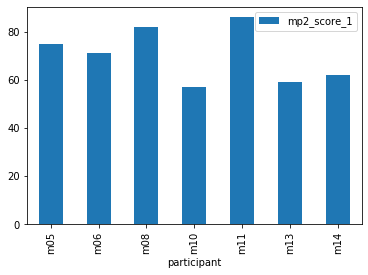

In [438]:
mp2_scores_1_bar = mp2_scores_1.plot.bar()

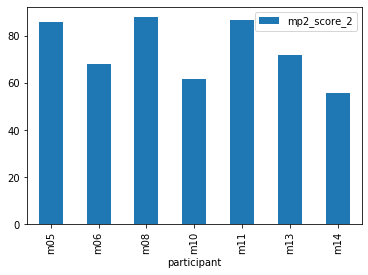

In [439]:
mp2_scores_2_bar = mp2_scores_2.plot.bar()

In [440]:
mp2_scores = pd.merge(mp2_scores_1, mp2_scores_2, on = 'participant')

In [441]:
mp2_scores.columns=['Game 1','Game 2']
#mp2_scores.set_index('participant', inplace=True, drop=True)

In [442]:
mp2_scores

,Game 1,Game 2
participant,,
m05,75,86
m06,71,68
m08,82,88
m10,57,62
m11,86,87
m13,59,72
m14,62,56


([<matplotlib.axis.YTick at 0x1a24974b10>,
 <a list of 6 Text yticklabel objects>)

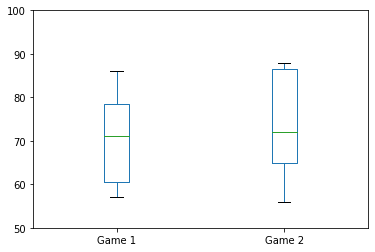

In [443]:
mp2_scores_box = mp2_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

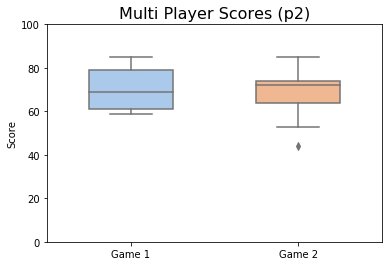

In [444]:
mp2_scores_box = sns.boxplot( 
                 data=c_scores, 
                 width=0.5,
                 palette="pastel")
mp2_scores_box.axes.set_title("Multi Player Scores (p2)",
                    fontsize=16)

plot_file_name="mp2_score_box.jpg"
 
plt.ylim(0, 100)
mp2_scores_box.axes.set(ylabel='Score')

# save as jpeg
mp2_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [445]:
mp2_scores_p = sp.stats.ttest_rel(mp2_scores['Game 1'],mp2_scores['Game 2'])

In [446]:
mp2_scores_p

Ttest_relResult(statistic=-1.4607048081612402, pvalue=0.19439808102551945)

In [448]:
#combine g1 and g2 to one dataframe
mp2_combo = mp2_scores_1.append(mp2_scores_2)

In [449]:
'''mp2_combo = pd.DataFrame({'participant':['m05', 'm05','m06', 'm06', 'm08', 'm08', 'm10', 'm10', 'm11', 'm11', 'm13', 'm13', 'm14', 'm14'], 'score':
[m05_p2_g1_score, m05_p2_g2_score, m06_p2_g1_score, m06_p2_g2_score, m08_p2_g1_score, m08_p2_g2_score, m10_p2_g1_score, m10_p2_g2_score, m11_p2_g1_score, m11_p2_g2_score, m13_p2_g1_score, m13_p2_g2_score, m14_p2_g1_score, m14_p2_g2_score]})'''

"mp2_combo = pd.DataFrame({'participant':['m05', 'm05','m06', 'm06', 'm08', 'm08', 'm10', 'm10', 'm11', 'm11', 'm13', 'm13', 'm14', 'm14'], 'score':\n[m05_p2_g1_score, m05_p2_g2_score, m06_p2_g1_score, m06_p2_g2_score, m08_p2_g1_score, m08_p2_g2_score, m10_p2_g1_score, m10_p2_g2_score, m11_p2_g1_score, m11_p2_g2_score, m13_p2_g1_score, m13_p2_g2_score, m14_p2_g1_score, m14_p2_g2_score]})"

In [450]:
#mp2_combo.set_index('participant', inplace=True, drop=True)

In [451]:
mp2_combo

,mp2_score_1,mp2_score_2
participant,,
m05,75.0,NaN
m06,71.0,NaN
m08,82.0,NaN
m10,57.0,NaN
m11,86.0,NaN
m13,59.0,NaN
m14,62.0,NaN
m05,NaN,86.0
m06,NaN,68.0


In [452]:
mp2_combo = mp2_combo.sort_values(by=['participant'])

In [453]:
mp2_combo

,mp2_score_1,mp2_score_2
participant,,
m05,75.0,NaN
m05,NaN,86.0
m06,71.0,NaN
m06,NaN,68.0
m08,82.0,NaN
m08,NaN,88.0
m10,57.0,NaN
m10,NaN,62.0
m11,86.0,NaN


In [454]:
mp2_scores_1_mean = mp2_scores_1.mean()

In [455]:
mp2_scores_1_mean

mp2_score_1    70.285714
dtype: float64

In [456]:
mp2_scores_1_std = mp2_scores_1.std()

In [457]:
mp2_scores_1_std 

mp2_score_1    11.397577
dtype: float64

In [458]:
mp2_scores_2_mean = mp2_scores_2.mean()

In [459]:
mp2_scores_2_mean

mp2_score_2    74.142857
dtype: float64

In [460]:
mp2_scores_2_std = mp2_scores_2.std()

In [461]:
mp2_scores_2_std

mp2_score_2    13.018302
dtype: float64

# End of G1 G2 analysis

In [ ]:
#j_g1_scores = pd.DataFrame([j02_p1_g1_score, j02_p2_g1_score, j01_p1_g1_score, j01_p2_g1_score, j03_p1_g1_score, j03_p2_g1],index = ['j02_p1_g1_score', 'j02_p2_g1_score', 'jo1_p1_g1_score', 'j01_p2_g1_score', 'j03_p1_g1', 'j03_p2_g1'], columns=['score'])

In [ ]:
#s_list = [s01,s02,s03,s05,s06,s07,s08,s09]

In [ ]:
#s01_p1_g1, s01_p1_g2 = separate_df(s01, 's')
s02_p1_g1, s02_p1_g2 = separate_df(s02, 's')
s03_p1_g1, s03_p1_g2 = separate_df(s03, 's')
s05_p1_g1, s05_p1_g2 = separate_df(s05, 's')
s06_p1_g1, s06_p1_g2 = separate_df(s06, 's')
s07_p1_g1, s07_p1_g2 = separate_df(s07, 's')
s08_p1_g1, s08_p1_g2 = separate_df(s08, 's')
s09_p1_g1, s09_p1_g2 = separate_df(s09, 's')




In [ ]:
#s01_p1_g1_count = s01_p1_g1['probability'].value_counts(sort=False)
s01_p1_g2_count = s01_p1_g2['probability'].value_counts(sort=False)
s02_p1_g1_count = s02_p1_g1['probability'].value_counts(sort=False) #no second game
s03_p1_g1_count = s03_p1_g1['probability'].value_counts(sort=False)
s03_p1_g2_count = s03_p1_g2['probability'].value_counts(sort=False)
s05_p1_g1_count = s05_p1_g1['probability'].value_counts(sort=False)
s05_p1_g2_count = s05_p1_g2['probability'].value_counts(sort=False)
s06_p1_g1_count = s06_p1_g1['probability'].value_counts(sort=False)
s06_p1_g2_count = s06_p1_g2['probability'].value_counts(sort=False)
s07_p1_g1_count = s07_p1_g1['probability'].value_counts(sort=False)
s07_p1_g2_count = s07_p1_g2['probability'].value_counts(sort=False)
s08_p1_g1_count = s08_p1_g1['probability'].value_counts(sort=False)
s08_p1_g2_count = s08_p1_g2['probability'].value_counts(sort=False)
s09_p1_g1_count = s09_p1_g1['probability'].value_counts(sort=False)
s09_p1_g2_count = s09_p1_g2['probability'].value_counts(sort=False)

In [ ]:
#s_g1_counts = pd.DataFrame([s01_p1_g1_count, s02_p1_g1_count, s03_p1_g1_count, 
                            s05_p1_g1_count, s06_p1_g1_count, s07_p1_g1_count, s08_p1_g1_count, s09_p1_g1_count],
                         #title of columns index=['s01_p1_g1_count', 's02_p1_g1_count', 's03_p1_g1_count', 
                            's05_p1_g1_count', 's06_p1_g1_count', 's07_p1_g1_count', 's08_p1_g1_count', 's09_p1_g1_count'])

# Choices in G1 and G2

In [ ]:
c_g1_counts

In [ ]:
s_g1_counts = s_g1_counts.drop(['s02_p1_g1_count'])

In [ ]:
s_g1_counts_bar = s_g1_counts.plot.bar()

In [ ]:
s_g1_counts_box = sns.boxplot( 
                 data=s_g1_counts, 
                 width=0.5,
                 palette="pastel")
s_g1_counts_box.axes.set_title("Single Player Choice Distributions in Game 1",
                    fontsize=16)

plot_file_name="s_g1_counts_box.jpg"
 
plt.ylim(0, 100)
s_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
s_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [ ]:
#make a value counts graph for hannah

In [ ]:
#low is the 30 hole (corresponds to 0)
s_g1_low = np.mean(s_g1_counts.iloc[:,0])

In [ ]:
#med if the 60 hole
s_g1_med = np.mean(s_g1_counts.iloc[:,1])

In [ ]:
#high is the 90 hole
s_g1_high = np.mean(s_g1_counts.iloc[:,2])

In [ ]:
s_g1_low_std = np.std(s_g1_counts.iloc[:,0])
s_g1_med_std = np.std(s_g1_counts.iloc[:,1])
s_g1_high_std = np.std(s_g1_counts.iloc[:,2])

In [ ]:
#print
s_g1_low

In [ ]:
s_g1_med

In [ ]:
s_g1_high

In [ ]:
s_g2_counts = pd.DataFrame([s01_p1_g2_count, s03_p1_g2_count, 
                            s05_p1_g2_count, s06_p1_g2_count, s07_p1_g2_count, s08_p1_g2_count, s09_p1_g2_count],
                          index=['s01_p1_g2_count', 's03_p1_g2_count', 's05_p1_g2_count', 's06_p1_g2_count', 's07_p1_g2_count', 's08_p1_g2_count', 's09_p1_g2_count'])

In [ ]:
s05_p1_g2_count = s05_p1_g2['probability'].value_counts(sort=False)

In [ ]:
s_g2_counts_box = sns.boxplot( 
                 data=s_g2_counts, 
                 width=0.5,
                 palette="pastel")
s_g2_counts_box.axes.set_title("Single Player Choice Distributions in Game 2",
                    fontsize=16)

plot_file_name="s_g2_counts_box.jpg"
 
plt.ylim(0, 100)
s_g2_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
s_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [ ]:
pip install researchpy

In [ ]:
import researchpy as rp

In [ ]:
s_60_1 = np.array(s_g1_counts.iloc[:,1])
s_60_2 = np.array(s_g2_counts.iloc[:,1])

In [ ]:
s_g2_counts

In [ ]:
s_60_1

In [ ]:
#number of times 60 hole was chosen
s_60_2 = [13,21,0,6,22,11,31]

In [ ]:
s_30_1 = np.array(s_g1_counts.iloc[:,0])
s_30_2 = [31,20,0,0,13,6,8]

In [ ]:
s_30_1

In [ ]:
s_30_2

In [ ]:
s_60_p = sp.stats.ttest_rel(s_60_1,s_60_2)

In [ ]:
s_30_p = sp.stats.ttest_rel(s_30_1,s_30_2)

In [ ]:
s_60_p

In [ ]:
s_30_p

In [ ]:
#CHANGE NaN to 0?

In [ ]:
#maximizing and matching?

In [ ]:
s_g2_counts_bar = s_g2_counts.plot.bar()

In [ ]:
s_g2_low = np.mean(s_g2_counts.iloc[:,0])
s_g2_med = np.mean(s_g2_counts.iloc[:,1])
s_g2_high = np.mean(s_g2_counts.iloc[:,2])

In [ ]:
s_g2_low_std = np.std(s_g2_counts.iloc[:,0])
s_g2_med_std = np.std(s_g2_counts.iloc[:,1])
s_g2_high_std = np.std(s_g2_counts.iloc[:,2])

In [ ]:
s_g2_low

In [ ]:
s_g2_med

In [ ]:
s_g2_high

In [ ]:
s_scores_1_mean

In [ ]:
s_scores_2_mean

# Joint Analysis

In [ ]:
df = organize_trial_by_trial('data/j01_gamedata.csv')
j01 = df
j01_p1_g1_score,j01_p1_g2_score,j01_p2_g1_score,j01_p2_g2_score,j01_p1_diff,j01_p2_diff = call_get_score(j01, 'j')
j01.head()

In [ ]:
df = organize_trial_by_trial('data/j02_gamedata.csv')
j02 = df
j02_p1_g1_score,j02_p1_g2_score,j02_p2_g1_score,j02_p2_g2_score,j02_p1_diff,j02_p2_diff = call_get_score(j02, 'j')
j02.head()

In [ ]:
df = organize_trial_by_trial('data/j03_gamedata.csv')
j03 = df
j03_p1_g1_score,j03_p1_g2_score,j03_p2_g1_score,j03_p2_g2_score,j03_p1_diff,j03_p2_diff = call_get_score(j03, 'j')
j03.head()

In [ ]:
df = organize_trial_by_trial('data/j04_gamedata.csv')
j04 = df
j04_p1_g1_score,j04_p1_g2_score,j04_p2_g1_score,j04_p2_g2_score,j04_p1_diff,j04_p2_diff = call_get_score(j04, 'j')
j04.head()

In [ ]:
df = organize_trial_by_trial('data/j05_gamedata.csv')
j05 = df
j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,j05_p2_g2_score,j05_p1_diff,j05_p2_diff = call_get_score(j05, 'j')
j05.head()

In [ ]:
df = organize_trial_by_trial('data/j06_gamedata.csv')
j06 = df
j06_p1_g1_score,j06_p1_g2_score,j06_p2_g1_score,j06_p2_g2_score,j06_p1_diff,j06_p2_diff = call_get_score(j06, 'j')
j06.head()

In [ ]:
df = organize_trial_by_trial('data/j07_gamedata.csv')
j07 = df
j07_p1_g1_score,j07_p1_g2_score,j07_p2_g1_score,j07_p2_g2_score,j07_p1_diff,j07_p2_diff = call_get_score(j07, 'j')
j07.head()

In [ ]:
df = organize_trial_by_trial('data/j08_gamedata.csv')
j08 = df
j08_p1_g1_score,j08_p1_g2_score,j08_p2_g1_score,j08_p2_g2_score,j08_p1_diff,j08_p2_diff = call_get_score(j08, 'j')
j08.head()

# Scores in G1 and G2

In [ ]:
j_scores_1 = pd.DataFrame({'participant':['j01_p1_g1_score','j01_p2_g1_score','j02_p1_g1_score','j02_p2_g1_score','j03_p1_g1_score','j03_p2_g1_score','j04_p1_g1_score',
      'j04_p2_g1_score','j05_p1_g1_score','j05_p2_g1_score','j06_p1_g1_score','j06_p2_g1_score','j07_p1_g1_score','j07_p2_g1_score',
      'j08_p1_g1_score', 'j08_p2_g1_score'], 'score':
     [j01_p1_g1_score,j01_p2_g1_score,j02_p1_g1_score,j02_p2_g1_score,j03_p1_g1_score,j03_p2_g1_score,j04_p1_g1_score,
      j04_p2_g1_score,j05_p1_g1_score,j05_p2_g1_score,j06_p1_g1_score,j06_p2_g1_score,j07_p1_g1_score,j07_p2_g1_score,
      j08_p1_g1_score, j08_p2_g1_score]})
#j_scores_1.set_index('participant', inplace=True, drop=True)
j_scores_2 = pd.DataFrame({'participant':['j01_p1_g2_score','j01_p2_g2_score','j02_p1_g2_score','j02_p2_g2_score','j03_p1_g2_score','j03_p2_g2_score','j04_p1_g2_score',
      'j04_p2_g2_score','j05_p1_g2_score','j05_p2_g2_score','j06_p1_g2_score','j06_p2_g2_score','j07_p1_g2_score','j07_p2_g2_score',
      'j08_p1_g2_score', 'j08_p2_g2_score'], 'score':
     [j01_p1_g2_score,j01_p2_g2_score,j02_p1_g2_score,j02_p2_g2_score,j03_p1_g2_score,j03_p2_g2_score,j04_p1_g2_score,
      j04_p2_g2_score,j05_p1_g2_score,j05_p2_g2_score,j06_p1_g2_score,j06_p2_g2_score,j07_p1_g2_score,j07_p2_g2_score,
      j08_p1_g2_score, j08_p2_g2_score]})
#j_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)
j_scores_1

In [ ]:
j_scores_2

In [ ]:
#j_scroes = j_scores_1.merge(j_scores_2, how='outer', left_index=True, right_index=True)
j_scores = pd.concat([j_scores_1,j_scores_2],axis=1,sort=False)

In [ ]:
j_scores

In [ ]:
j_scores = j_scores.drop(columns="participant")

In [ ]:
j_scores_med = j_scores.median()
s_scores_med = s_scores.median()

In [ ]:
j_scores_med

In [ ]:
s_scores_med

In [ ]:
j_scores.columns=['Game 1','Game 2']

In [ ]:
j_scores_box = j_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

In [ ]:
s_scores_box = s_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

In [ ]:
j_scores_box = sns.boxplot( 
                 data=j_scores, 
                 width=0.5,
                 palette="pastel")
j_scores_box.axes.set_title("Multiplayer Scores",
                    fontsize=16)
j_scores_box.axes.set(ylabel='Score')
plt.ylim(0, 100)
j_scores_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [ ]:
scores_p_1 = sp.stats.ttest_ind(j_scores_1['score'],s_scores_1['score'])

In [ ]:
scores_p_2 = sp.stats.ttest_ind(j_scores_2['score'],s_scores_2['score'])

In [ ]:
scores_p_1

In [ ]:
scores_p_2

In [ ]:
j_scores_p = sp.stats.ttest_rel(j_scores_1['score'],j_scores_2['score'])

In [ ]:
j_scores_p

In [ ]:
s_scores_p

In [ ]:
plot_file_name="j_score_box.jpg"
 
# save as jpeg
j_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)


In [ ]:
j_scores_1_mean = j_scores_1.mean()

In [ ]:
j_scores_1_std = j_scores_1.std()

In [ ]:
j_scores_2_mean = j_scores_2.mean()

In [ ]:
j_scores_1_mean

In [ ]:
j_scores_2_mean

In [ ]:
j_scores_2_std = j_scores_2.std()

In [ ]:
j_scores_1_std

In [ ]:
#combine g1 and g2 to one dataframe
j_combo = j_scores_1.append(j_scores_2)

In [ ]:
j_combo

In [ ]:
#hypothesis: scores lower for same gender pairs: male-male

In [ ]:
scores_f = pd.DataFrame([j03_p1_g1_score,j03_p1_g2_score,j03_p2_g1_score,j03_p2_g2_score,j04_p1_g1_score,
            j04_p1_g2_score,j04_p2_g1_score,j04_p2_g2_score,j07_p1_g1_score,j07_p1_g2_score,j07_p2_g1_score,
            j07_p2_g2_score,j08_p1_g1_score,j08_p1_g2_score,j08_p2_g1_score,j08_p2_g2_score])

In [ ]:
scores_mix = pd.DataFrame([j01_p1_g1_score,j01_p1_g2_score,j01_p2_g1_score,j01_p2_g2_score,j02_p1_g1_score,
            j02_p1_g2_score,j02_p2_g1_score,j02_p2_g2_score,j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,
            j05_p2_g2_score,j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,j05_p2_g2_score,j06_p1_g1_score,
            j06_p1_g2_score,j06_p2_g1_score,j06_p2_g2_score])

In [ ]:
#m_mean=scores_m.mean()
f_mean=scores_f.mean()
mix_mean=scores_mix.mean()

In [ ]:
#m_mean

In [ ]:
f_mean

In [ ]:
mix_mean

In [ ]:
j_combo = j_combo.sort_values(by=['participant'])

In [ ]:
j_combo_bar = j_combo.plot(kind='bar',color=colors)

In [ ]:
j_score_diff = pd.DataFrame({'participant':['j01_p1','j01_p2','j02_p1','j02_p2','j03_p1','j03_p2','j04_p1','j04_p2',
                                          'j05_p1','j05_p2','j06_p1','j06_p2','j07_p1','j07_p2','j06_p1','j06_p2'], 'score_diff':
     [j01_p1_diff,j01_p2_diff,j02_p1_diff,j02_p2_diff,j03_p1_diff,j03_p2_diff,j04_p1_diff,j04_p2_diff,
     j05_p1_diff,j05_p2_diff,j06_p1_diff,j06_p2_diff,j07_p1_diff,j07_p2_diff,j08_p1_diff,j08_p2_diff]})

In [ ]:
j_score_diff

In [ ]:
#impairs learning?

In [ ]:
#pattern within sessions for score_diff?
#5 ppl did worse second time; joint interfered with learning

In [ ]:
j_score_diff_mean = j_score_diff['score_diff'].mean()

In [ ]:
j_score_diff_mean

In [ ]:
j01_p1_g1, j01_p1_g2, j01_p2_g1, j01_p2_g2 = separate_df(j01, 'j')
j02_p1_g1, j02_p1_g2, j02_p2_g1, j02_p2_g2 = separate_df(j02, 'j')
j03_p1_g1, j03_p1_g2, j03_p2_g1, j03_p2_g2 = separate_df(j03, 'j')
j04_p1_g1, j04_p1_g2, j04_p2_g1, j04_p2_g2 = separate_df(j04, 'j')
j05_p1_g1, j05_p1_g2, j05_p2_g1, j05_p2_g2 = separate_df(j05, 'j')
j06_p1_g1, j06_p1_g2, j06_p2_g1, j06_p2_g2 = separate_df(j06, 'j')
j07_p1_g1, j07_p1_g2, j07_p2_g1, j07_p2_g2 = separate_df(j07, 'j')
j08_p1_g1, j08_p1_g2, j08_p2_g1, j08_p2_g2 = separate_df(j08, 'j')

# Choice Distributions

In [ ]:
j01_p1_g1_count = j01_p1_g1['probability'].value_counts(sort=False)
j01_p1_g2_count = j01_p1_g2['probability'].value_counts(sort=False)
j01_p2_g1_count = j01_p2_g1['probability'].value_counts(sort=False)
j01_p2_g2_count = j01_p2_g2['probability'].value_counts(sort=False)
j02_p1_g1_count = j02_p1_g1['probability'].value_counts(sort=False)
j02_p1_g2_count = j02_p1_g2['probability'].value_counts(sort=False)
j02_p2_g1_count = j02_p2_g1['probability'].value_counts(sort=False)
j02_p2_g2_count = j02_p2_g2['probability'].value_counts(sort=False)
j03_p1_g1_count = j03_p1_g1['probability'].value_counts(sort=False)
j03_p1_g2_count = j03_p1_g2['probability'].value_counts(sort=False)
j03_p2_g1_count = j03_p2_g1['probability'].value_counts(sort=False)
j03_p2_g2_count = j03_p2_g2['probability'].value_counts(sort=False)
j04_p1_g1_count = j04_p1_g1['probability'].value_counts(sort=False)
j04_p1_g2_count = j04_p1_g2['probability'].value_counts(sort=False)
j04_p2_g1_count = j04_p2_g1['probability'].value_counts(sort=False)
j04_p2_g2_count = j04_p2_g2['probability'].value_counts(sort=False)
j05_p1_g1_count = j05_p1_g1['probability'].value_counts(sort=False)
j05_p1_g2_count = j05_p1_g2['probability'].value_counts(sort=False)
j05_p2_g1_count = j05_p2_g1['probability'].value_counts(sort=False)
j05_p2_g2_count = j05_p2_g2['probability'].value_counts(sort=False)
j06_p1_g1_count = j06_p1_g1['probability'].value_counts(sort=False)
j06_p1_g2_count = j06_p1_g2['probability'].value_counts(sort=False)
j06_p2_g1_count = j06_p2_g1['probability'].value_counts(sort=False)
j06_p2_g2_count = j06_p2_g2['probability'].value_counts(sort=False)
j07_p1_g1_count = j07_p1_g1['probability'].value_counts(sort=False)
j07_p1_g2_count = j07_p1_g2['probability'].value_counts(sort=False)
j07_p2_g1_count = j06_p2_g1['probability'].value_counts(sort=False)
j07_p2_g2_count = j06_p2_g2['probability'].value_counts(sort=False)
j08_p1_g1_count = j08_p1_g1['probability'].value_counts(sort=False)
j08_p1_g2_count = j08_p1_g2['probability'].value_counts(sort=False)
j08_p2_g1_count = j08_p2_g1['probability'].value_counts(sort=False)
j08_p2_g2_count = j08_p2_g2['probability'].value_counts(sort=False)

In [ ]:
j01_p1_g1_count

In [ ]:
j01_p1_g2_count

In [ ]:
j01_p2_g1_count

In [ ]:
j01_p2_g2_count

In [ ]:
j02_p1_g1_count

In [ ]:
j02_p1_g2_count

In [ ]:
j02_p2_g1_count

In [ ]:
j02_p2_g2_count

In [ ]:
j03_p1_g1_count

In [ ]:
j03_p1_g2_count

In [ ]:
j03_p2_g1_count

In [ ]:
j03_p2_g2_count

In [ ]:
j_g1_counts = pd.DataFrame([j01_p1_g1_count, j01_p2_g1_count, j02_p1_g1_count, j02_p2_g1_count, 
                            j03_p1_g1_count, j03_p2_g1_count, j04_p1_g1_count, j04_p2_g1_count,
                           j05_p1_g1_count,j05_p2_g1_count, j06_p1_g1_count, j06_p2_g1_count, j07_p1_g1_count, 
                            j07_p2_g1_count, j08_p1_g1_count, j08_p2_g1_count],
                          index=['j01_p1_g1_count', 'j01_p2_g1_count', 'j02_p1_g1_count', 'j02_p2_g1_count', 
                            'j03_p1_g1_count', 'j03_p2_g1_count', 'j04_p1_g1_count', 'j04_p2_g1_count',
                           'j05_p1_g1_count','j05_p2_g1_count', 'j06_p1_g1_count', 'j06_p2_g1_count', 'j07_p1_g1_count', 
                            'j07_p2_g1_count', 'j08_p1_g1_count', 'j08_p2_g1_count'])

In [ ]:
j_g1_counts

In [ ]:
j_g1_low = np.mean(j_g1_counts.iloc[:,0])
j_g1_med = np.mean(j_g1_counts.iloc[:,1])
j_g1_high = np.mean(j_g1_counts.iloc[:,2])

j_g1_low_std = np.std(j_g1_counts.iloc[:,0])
j_g1_med_std = np.std(j_g1_counts.iloc[:,1])
j_g1_high_std = np.std(j_g1_counts.iloc[:,2])

In [ ]:
j_g1_low

In [ ]:
j_g1_med

In [ ]:
j_g1_high

In [ ]:
#social matching

In [ ]:
j_g2_counts = pd.DataFrame([j01_p1_g2_count, j01_p2_g2_count, j02_p1_g2_count, j02_p2_g2_count, 
                            j03_p1_g2_count, j03_p2_g2_count, j04_p1_g2_count, j04_p2_g2_count,
                           j05_p1_g2_count,j05_p2_g2_count, j06_p1_g2_count, j06_p2_g2_count, j07_p1_g2_count, 
                            j07_p2_g2_count, j08_p1_g2_count, j08_p2_g2_count],
                          index=['j01_p1_g2_count', 'j01_p2_g2_count', 'j02_p1_g2_count', 'j02_p2_g2_count', 
                            'j03_p1_g2_count', 'j03_p2_g2_count', 'j04_p1_g2_count', 'j04_p2_g2_count',
                           'j05_p1_g2_count','j05_p2_g2_count', 'j06_p1_g2_count', 'j06_p2_g2_count', 'j07_p1_g2_count', 
                            'j07_p2_g2_count', 'j08_p1_g2_count', 'j08_p2_g2_count'])

In [ ]:
j_g2_counts

In [ ]:
j_60_p = sp.stats.ttest_rel(j_g1_counts.iloc[:,1],j_g2_counts.iloc[:,1])

In [ ]:
j_60_p

In [ ]:
j_30_p = sp.stats.ttest_rel(j_g1_counts.iloc[:,0],j_g2_counts.iloc[:,0])

In [ ]:
j_30_p

In [ ]:
j_g2_low = np.mean(j_g2_counts.iloc[:,0])
j_g2_med = np.mean(j_g2_counts.iloc[:,1])
j_g2_high = np.mean(j_g2_counts.iloc[:,2])

j_g2_low_std = np.std(j_g2_counts.iloc[:,0])
j_g2_med_std = np.std(j_g2_counts.iloc[:,1])
j_g2_high_std = np.std(j_g2_counts.iloc[:,2])

In [ ]:
j_g2_low

In [ ]:
j_g2_med

In [ ]:
j_g2_high

In [ ]:
j_g1_counts_bar = j_g1_counts.plot.bar()

In [ ]:
j_g2_counts_bar = j_g2_counts.plot.bar()

In [ ]:
j_g1_counts_box = sns.boxplot( 
                 data=j_g1_counts, 
                 width=0.5,
                 palette="pastel")
j_g1_counts_box.axes.set_title("Multiplayer Choice Distributions in Game 1",
                    fontsize=16)

plot_file_name="j_g1_counts_box.jpg"

plt.ylim(0, 100)
j_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [ ]:
j_g2_counts_box = sns.boxplot( 
                 data=j_g2_counts, 
                 width=0.5,
                 palette="pastel")
j_g2_counts_box.axes.set_title("Multiplayer Choice Distributions in Game 2",
                    fontsize=16)

plot_file_name="j_g2_counts_box.jpg"

plt.ylim(0, 100)
j_g2_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [ ]:
hannah_counts = pd.DataFrame([s08_p1_g1_count,s08_p1_g2_count,s09_p1_g1_count,s09_p1_g2_count,j01_p1_g1_count,
                              j01_p1_g2_count,j01_p2_g1_count,j01_p2_g2_count,j05_p1_g1_count,j05_p1_g2_count,j05_p1_g1_count,
                              j05_p2_g2_count],
                          index=['s08 Game 1','s08 Game 2','s09 Game 1','s09 Game 2','j01_1 Game 1','j01_1 Game 2',
                                'j01_2 Game 1','j01_2 Game 2','j05_1 Game 1','j05_1 Game 2','j05_2 Game 1','j05_2 Game 2'])

In [ ]:
hannah_counts

In [ ]:
hannah_counts.to_pickle('hannah_counts_table.pkl')

In [ ]:
hannah_counts_bar = hannah_counts.plot.bar(title='Choice Distributions')
plt.tight_layout()
plt.savefig('hannah_counts.eps',format='eps',dpi=1000)

# Combined Tables

In [ ]:
#NEEDS WORK
scores_df = pd.DataFrame({'score':[s_scores_1_mean, s_scores_2_mean, j_scores_1_mean, j_scores_2_mean],
                       'std':[s_scores_1_std,s_scores_2_std,j_scores_1_std,j_scores_2_std]},index = ['s_1','s_2',
                                                                                                     'j_1', 'j_2'])

In [ ]:
s_scores_1_mean

In [ ]:
pd.to_numeric(s_scores_1_mean)

In [ ]:
scores_df

In [ ]:
counts_df = pd.DataFrame({'low':[s_g1_low,s_g2_low,j_g1_low,j_g2_low],'medium':[s_g1_med,s_g2_med,j_g1_med,j_g2_med],
                          'high':[s_g1_high,s_g2_high,j_g1_high,j_g2_high]},index = ['s_1','s_2','j_1', 'j_2'])
#add standard deviations

In [ ]:
counts_df

In [ ]:
#j learn to favor medium over the low in game 2

In [ ]:
counts_std_df = pd.DataFrame({'low':[s_g1_low_std,s_g2_low_std,j_g1_low_std,j_g2_low_std],'medium':[s_g1_med_std,s_g2_med_std,j_g1_med_std,j_g2_med_std],
                          'high':[s_g1_high_std,s_g2_high_std,j_g1_high_std,j_g2_high_std]},index = ['s_1','s_2','j_1', 'j_2'])

In [ ]:
counts_std_df

In [ ]:
#high deviations in high and med in game 2
#evidence of 2 subgroups?

# Maximizing/Matching

In [ ]:
scores

In [ ]:
def jsd(p, q, base=np.e):
    '''
        Implementation of pairwise `jsd` based on  
        https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
    '''
    ## convert to np.array
    p, q = np.asarray(p), np.asarray(q)
    ## normalize p, q to probabilities
    p, q = p/p.sum(), q/q.sum()
    m = 1./2*(p + q)
    return sp.stats.entropy(p,m, base=base)/2. +  sp.stats.entropy(q, m, base=base)/2.

In [ ]:
#are ppl using a strategy similar to their partner's?
#calls jsd for p1 and p2 and for p1 and p2 with the mean
def compare_strat(p1,p2):
    strat = jsd(p1,p2)
    comp_1 = jsd(p1,[j_g1_low,j_g1_med,j_g1_high])
    comp_2 = jsd(p2,[j_g1_low,j_g1_med,j_g1_high])
    return strat, comp_1, comp_2

In [ ]:
#jsd_1_strat

In [ ]:
#jsd_1_comp

In [ ]:
maximize = [0,0,100]
match = [30/180 * 100,60/180 * 100,50]

In [ ]:
def call_jsd(counts):
    maxi = jsd(counts,maximize)
    matchi = jsd(counts,match)
    return maxi,matchi

In [ ]:
social_max = [0, 100, 0]
social_match = [30/180 * 100,30/180 * 100, 30/180 * 100]

In [ ]:
def call_jsd_social(counts):
    maxi = jsd(counts,social_max)
    matchi = jsd(counts,social_match)
    return maxi,matchi

In [ ]:
s01_p1_g1_count

In [ ]:
from scipy import stats

In [ ]:
#test = jsd(maximize,match)

In [ ]:
#test

In [ ]:
s01 = 'match'

In [ ]:
s05_p1_g2_count

In [ ]:
s05_p1_g2_count = [11,0,89]

In [ ]:
s01_g1_max,s01_g1_match = call_jsd(s01_p1_g1_count)
s01_g2_max,s01_g2_match = call_jsd(s01_p1_g2_count)
s02_g1_max,s02_g1_match = call_jsd(s02_p1_g1_count)
s03_g1_max,s03_g1_match = call_jsd(s03_p1_g1_count)
s03_g2_max,s03_g2_match = call_jsd(s03_p1_g2_count)
s05_g1_max,s05_g1_match = call_jsd(s05_p1_g1_count)
s05_g2_max,s05_g2_match = call_jsd(s05_p1_g2_count)
s06_g1_max,s06_g1_match = call_jsd(s06_p1_g1_count)
s06_g2_max,s06_g2_match = call_jsd([0,6,74])
s07_g1_max,s07_g1_match = call_jsd(s07_p1_g1_count)
s07_g2_max,s07_g2_match = call_jsd(s07_p1_g2_count)
s08_g1_max,s08_g1_match = call_jsd(s08_p1_g1_count)
s08_g2_max,s08_g2_match = call_jsd(s08_p1_g2_count)
s09_g1_max,s09_g1_match = call_jsd(s09_p1_g1_count)
s09_g2_max,s09_g2_match = call_jsd(s09_p1_g2_count)

In [ ]:
s06_p1_g2_count

In [ ]:
s_jsd_g1 = pd.DataFrame({'max':[s01_g1_max,s02_g1_max,s03_g1_max,s05_g1_max,s06_g1_max,s07_g1_max,s08_g1_max,
                                s09_g1_max],
                      'match':[s01_g1_match,s02_g1_match,s03_g1_match,s05_g1_match
                               ,s06_g1_match,s07_g1_match,s08_g1_match,s09_g1_match]},
                        index=['s01', 's02', 's03','s05','s06','s07','s08','s09'])

In [ ]:
s_jsd_g2 = pd.DataFrame({'max':[s01_g2_max,s03_g2_max,s05_g2_max,s06_g2_max,s07_g2_max,s08_g2_max,
                                s09_g2_max],
                      'match':[s01_g2_match,s03_g2_match,s05_g2_match
                               ,s06_g2_match,s07_g2_match,s08_g2_match,s09_g2_match]},
                        index=['s01', 's03','s05','s06','s07','s08','s09'])

In [ ]:
#NOT WORKING
def check_type(df,*social):
    types = pd.DataFrame(index=['type'])
    for index,row in df.iterrows():
        maxi = row["max"]
        matchi = row["match"]
        print(index,maxi,matchi)
        if maxi < matchi:
            print('maxi')
            types = types.append({'type' : 'maxi'},ignore_index=True)
            #types[index,'type'] = 'max'
            num = maxi
        elif matchi < maxi:
            print('matchi')
            types = types.append({'type' : 'matchi'},ignore_index=True)
            num = matchi
        else:
            types = types.append({'type' : 'neither'},ignore_index=True)
            num = 1
        if social == True:
            if num >= jsd(social_max,social_match):
                types = types.append({'type' : 'neither'},ignore_index=True)
        else:
            if num >= jsd(maximize,match):
                types = types.append({'type' : 'neither'},ignore_index=True)
    return types

In [ ]:
#s_jsd.apply(check_type,axis=1)

In [ ]:
#s_types_g1 = check_type(s_jsd_g1)

In [ ]:
#s_types_g2 = check_type(s_jsd_g1)

In [ ]:
#s_types_g1.drop([0])

In [ ]:
#s_types_g2.drop([0])

In [ ]:
threshold = jsd(maximize,match)

In [ ]:
threshold

In [ ]:
s_jsd_g1

In [ ]:
s_jsd_g2

In [ ]:
j01_p1_g1_max,j01_p1_g1_match = call_jsd(j01_p1_g1_count)
j01_p1_g2_max,j01_p1_g2_match = call_jsd(j01_p1_g2_count)
j01_p2_g1_max,j01_p2_g1_match = call_jsd(j01_p2_g1_count)
j01_p2_g2_max,j01_p2_g2_match = call_jsd(j01_p2_g2_count)
j02_p1_g1_max,j02_p1_g1_match = call_jsd(j02_p1_g1_count)
j02_p1_g2_max,j02_p1_g2_match = call_jsd(j02_p1_g2_count)
j02_p2_g1_max,j02_p2_g1_match = call_jsd(j02_p2_g1_count)
j02_p2_g2_max,j02_p2_g2_match = call_jsd(j02_p2_g2_count)
j03_p1_g1_max,j03_p1_g1_match = call_jsd(j03_p1_g1_count)
j03_p1_g2_max,j03_p1_g2_match = call_jsd(j03_p1_g2_count)
j03_p2_g1_max,j03_p2_g1_match = call_jsd(j03_p2_g1_count)
j03_p2_g2_max,j03_p2_g2_match = call_jsd(j03_p2_g2_count)
j04_p1_g1_max,j04_p1_g1_match = call_jsd(j04_p1_g1_count)
j04_p1_g2_max,j04_p1_g2_match = call_jsd(j04_p1_g2_count)
j04_p2_g1_max,j04_p2_g1_match = call_jsd(j04_p2_g1_count)
j04_p2_g2_max,j04_p2_g2_match = call_jsd(j04_p2_g2_count)
j05_p1_g1_max,j05_p1_g1_match = call_jsd(j05_p1_g1_count)
j05_p1_g2_max,j05_p1_g2_match = call_jsd(j05_p1_g2_count)
j05_p2_g1_max,j05_p2_g1_match = call_jsd(j05_p2_g1_count)
j05_p2_g2_max,j05_p2_g2_match = call_jsd(j05_p2_g2_count)
j06_p1_g1_max,j06_p1_g1_match = call_jsd(j06_p1_g1_count)
j06_p1_g2_max,j06_p1_g2_match = call_jsd(j06_p1_g2_count)
j06_p2_g1_max,j06_p2_g1_match = call_jsd(j06_p2_g1_count)
j06_p2_g2_max,j06_p2_g2_match = call_jsd(j06_p2_g2_count)
j07_p1_g1_max,j07_p1_g1_match = call_jsd(j07_p1_g1_count)
j07_p1_g2_max,j07_p1_g2_match = call_jsd(j07_p1_g2_count)
j07_p2_g1_max,j07_p2_g1_match = call_jsd(j07_p2_g1_count)
j07_p2_g2_max,j07_p2_g2_match = call_jsd(j07_p2_g2_count)
j08_p1_g1_max,j08_p1_g1_match = call_jsd(j08_p1_g1_count)
j08_p1_g2_max,j08_p1_g2_match = call_jsd(j08_p1_g2_count)
j08_p2_g1_max,j08_p2_g1_match = call_jsd(j08_p2_g1_count)
j08_p2_g2_max,j08_p2_g2_match = call_jsd(j08_p2_g2_count)

In [ ]:
j_jsd_g1 = pd.DataFrame({'max':[j01_p1_g1_max,j01_p2_g1_max,j02_p1_g1_max,j02_p2_g1_max,j03_p1_g1_max,j03_p2_g1_max,
                             j04_p1_g1_max,j04_p2_g1_max,j05_p1_g1_max,j05_p2_g1_max,j06_p1_g1_max,j06_p2_g1_max,
                             j07_p1_g1_max,j07_p2_g1_max,j08_p1_g1_max,j08_p2_g1_max],
                      'match':[j01_p1_g1_match,j01_p2_g1_match,j02_p1_g1_match,
                               j02_p2_g1_match,j03_p1_g1_match,j03_p2_g1_match,
                               j04_p1_g1_match,j04_p2_g1_match,j05_p1_g1_match,
                               j05_p2_g1_match,j06_p1_g1_match,j06_p2_g1_match,
                               j07_p1_g1_match,j07_p2_g1_match,j08_p1_g1_match,j08_p2_g1_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [ ]:
j_jsd_g2 = pd.DataFrame({'max':[j01_p1_g2_max,j01_p2_g2_max,j02_p1_g2_max,j02_p2_g2_max,j03_p1_g2_max,j03_p2_g2_max,
                             j04_p1_g2_max,j04_p2_g2_max,j05_p1_g2_max,j05_p2_g2_max,j06_p1_g2_max,j06_p2_g2_max,
                             j07_p1_g2_max,j07_p2_g2_max,j08_p1_g2_max,j08_p2_g2_max],
                      'match':[j01_p1_g2_match,j01_p2_g2_match,j02_p1_g2_match,
                               j02_p2_g2_match,j03_p1_g2_match,j03_p2_g2_match,
                               j04_p1_g2_match,j04_p2_g2_match,j05_p1_g2_match,
                               j05_p2_g2_match,j06_p1_g2_match,j06_p2_g2_match,
                               j07_p1_g2_match,j07_p2_g2_match,j08_p1_g2_match,j08_p2_g2_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [ ]:
#j_types_g1 = check_type(j_jsd_g1)

In [ ]:
#j_types_g2 = check_type(j_jsd_g2)

In [ ]:
#j_types_g1.drop([0])

In [ ]:
#j_types_g2.drop([0])

In [ ]:
j_jsd_g1

In [ ]:
j_jsd_g2

In [ ]:
#same for joint using "social"

In [ ]:
j01_p1_g1_max,j01_p1_g1_match = call_jsd_social(j01_p1_g1_count)
j01_p1_g2_max,j01_p1_g2_match = call_jsd_social(j01_p1_g2_count)
j01_p2_g1_max,j01_p2_g1_match = call_jsd_social(j01_p2_g1_count)
j01_p2_g2_max,j01_p2_g2_match = call_jsd_social(j01_p2_g2_count)
j02_p1_g1_max,j02_p1_g1_match = call_jsd_social(j02_p1_g1_count)
j02_p1_g2_max,j02_p1_g2_match = call_jsd_social(j02_p1_g2_count)
j02_p2_g1_max,j02_p2_g1_match = call_jsd_social(j02_p2_g1_count)
j02_p2_g2_max,j02_p2_g2_match = call_jsd_social(j02_p2_g2_count)
j03_p1_g1_max,j03_p1_g1_match = call_jsd_social(j03_p1_g1_count)
j03_p1_g2_max,j03_p1_g2_match = call_jsd_social(j03_p1_g2_count)
j03_p2_g1_max,j03_p2_g1_match = call_jsd_social(j03_p2_g1_count)
j03_p2_g2_max,j03_p2_g2_match = call_jsd_social(j03_p2_g2_count)
j04_p1_g1_max,j04_p1_g1_match = call_jsd_social(j04_p1_g1_count)
j04_p1_g2_max,j04_p1_g2_match = call_jsd_social(j04_p1_g2_count)
j04_p2_g1_max,j04_p2_g1_match = call_jsd_social(j04_p2_g1_count)
j04_p2_g2_max,j04_p2_g2_match = call_jsd_social(j04_p2_g2_count)
j05_p1_g1_max,j05_p1_g1_match = call_jsd_social(j05_p1_g1_count)
j05_p1_g2_max,j05_p1_g2_match = call_jsd_social(j05_p1_g2_count)
j05_p2_g1_max,j05_p2_g1_match = call_jsd_social(j05_p2_g1_count)
j05_p2_g2_max,j05_p2_g2_match = call_jsd_social(j05_p2_g2_count)
j06_p1_g1_max,j06_p1_g1_match = call_jsd_social(j06_p1_g1_count)
j06_p1_g2_max,j06_p1_g2_match = call_jsd_social(j06_p1_g2_count)
j06_p2_g1_max,j06_p2_g1_match = call_jsd_social(j06_p2_g1_count)
j06_p2_g2_max,j06_p2_g2_match = call_jsd_social(j06_p2_g2_count)
j07_p1_g1_max,j07_p1_g1_match = call_jsd_social(j07_p1_g1_count)
j07_p1_g2_max,j07_p1_g2_match = call_jsd_social(j07_p1_g2_count)
j07_p2_g1_max,j07_p2_g1_match = call_jsd_social(j07_p2_g1_count)
j07_p2_g2_max,j07_p2_g2_match = call_jsd_social(j07_p2_g2_count)
j08_p1_g1_max,j08_p1_g1_match = call_jsd_social(j08_p1_g1_count)
j08_p1_g2_max,j08_p1_g2_match = call_jsd_social(j08_p1_g2_count)
j08_p2_g1_max,j08_p2_g1_match = call_jsd_social(j08_p2_g1_count)
j08_p2_g2_max,j08_p2_g2_match = call_jsd_social(j08_p2_g2_count)

In [ ]:
j_jsd_g1_social = pd.DataFrame({'max':[j01_p1_g1_max,j01_p2_g1_max,j02_p1_g1_max,j02_p2_g1_max,j03_p1_g1_max,j03_p2_g1_max,
                             j04_p1_g1_max,j04_p2_g1_max,j05_p1_g1_max,j05_p2_g1_max,j06_p1_g1_max,j06_p2_g1_max,
                             j07_p1_g1_max,j07_p2_g1_max,j08_p1_g1_max,j08_p2_g1_max],
                      'match':[j01_p1_g1_match,j01_p2_g1_match,j02_p1_g1_match,
                               j02_p2_g1_match,j03_p1_g1_match,j03_p2_g1_match,
                               j04_p1_g1_match,j04_p2_g1_match,j05_p1_g1_match,
                               j05_p2_g1_match,j06_p1_g1_match,j06_p2_g1_match,
                               j07_p1_g1_match,j07_p2_g1_match,j08_p1_g1_match,j08_p2_g1_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [ ]:
j_jsd_g2_social = pd.DataFrame({'max':[j01_p1_g2_max,j01_p2_g2_max,j02_p1_g2_max,j02_p2_g2_max,j03_p1_g2_max,j03_p2_g2_max,
                             j04_p1_g2_max,j04_p2_g2_max,j05_p1_g2_max,j05_p2_g2_max,j06_p1_g2_max,j06_p2_g2_max,
                             j07_p1_g2_max,j07_p2_g2_max,j08_p1_g2_max,j08_p2_g2_max],
                      'match':[j01_p1_g2_match,j01_p2_g2_match,j02_p1_g2_match,
                               j02_p2_g2_match,j03_p1_g2_match,j03_p2_g2_match,
                               j04_p1_g2_match,j04_p2_g2_match,j05_p1_g2_match,
                               j05_p2_g2_match,j06_p1_g2_match,j06_p2_g2_match,
                               j07_p1_g2_match,j07_p2_g2_match,j08_p1_g2_match,j08_p2_g2_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [ ]:
#j_types_social = check_type(j_jsd_social,True)

In [ ]:
#j_types_social.drop([0])

In [ ]:
#j_jsd_social.drop([0])

In [ ]:
#issue

In [ ]:
j_jsd_g1_social

In [ ]:
threshold

In [ ]:
j_jsd_g2_social

In [ ]:
import matplotlib.lines as mlines

In [ ]:
#colors_jsd = [['lightcoral','red','lightcoral','red','bisque','orange','bisque','orange','palegreen','green','palegreen','green',
              #'lightblue','blue','lightblue','blue','mediumslateblue','indigo','mediumslateblue','indigo','lightpink','deeppink',
              #'lightpink','deeppink','yellow','gold','yellow','gold','lightgray','gray','lightgray','gray']              

In [ ]:
import itertools

In [ ]:
colors_jsd_j = ['red','lightcoral','orange','darkorange','green','palegreen',
              'blue','darkblue','hotpink','pink','purple','plum','peru','saddlebrown','gray','lightgray']
colors_jsd_s_g1 = ['red','orange','green','blue','pink','purple','peru','cyan']
colors_jsd_s_g2 = ['red','green','blue','pink','purple','peru','cyan']
markers_jsd = ['o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v'
          'o','v','o','v','o','v','o','v']
colors

In [ ]:
s_jsd_g1.mean()

In [ ]:
j_jsd_g1.mean()

In [ ]:
s_jsd_g2.mean()

In [ ]:
j_jsd_g2.mean()

In [ ]:
import matplotlib.patches as mpatches

In [ ]:
#create proxy artist for legend
patches = []
for index,row in j_jsd_g1.iterrows():
    for i in colors_jsd_j:
        patches.append(mpatches.Patch(color=i, label=index))

# legend not working

In [ ]:
#j_jsd_plot = j_jsd.plot.scatter(x='max',y='match',title='Multi Player JSD Values')
#line = mlines.Line2D([0.2148, 0], [0.2148, 1], color='red')
#j_jsd_plot.add_line(line)
#plt.show()

fig, j_jsd_g1_plot = plt.subplots()
j_jsd_g1_plot = j_jsd_g1.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multiplayer JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])
#line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')

line2 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
line3 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])

#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_g1_plot.add_line(line1)
#j_jsd_g1_plot.add_line(line2)
#j_jsd_g1_plot.add_line(line3)

#plt.legend(handles=patches)
plt.savefig('j_jsd_1.eps',format='eps',dpi=1000)
plt.show()




#color code pairs together

In [ ]:
#j_jsd_plot = j_jsd.plot.scatter(x='max',y='match',title='Multi Player JSD Values')
#line = mlines.Line2D([0.2148, 0], [0.2148, 1], color='red')
#j_jsd_plot.add_line(line)
#plt.show()

fig, j_jsd_g2_plot = plt.subplots()
j_jsd_g2_plot = j_jsd_g2.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multiplayer JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])
#line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')
line1 = mlines.Line2D([-1, 0.4],[-1, 0.4], color='red')
#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_g2_plot.add_line(line1)
#j_jsd_g2_plot.add_line(line2)
plt.savefig('j_jsd_2.eps',format='eps',dpi=1000)
plt.show()


#color code pairs together

In [ ]:
s_jsd_g1_plot = s_jsd_g1.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g1,title='Single Player JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([-1, 0.4],[-1, 0.4], color='red')

s_jsd_g1_plot.add_line(line1)
#s_jsd_g1_plot.add_line(line2)
plt.savefig('s_jsd_1.eps',format='eps',dpi=1000)
plt.show()

In [ ]:
s_jsd_g2_plot = s_jsd_g2.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g2,title='Single Player JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')

s_jsd_g2_plot.add_line(line1)
#s_jsd_g2_plot.add_line(line2)
plt.savefig('s_jsd_2.eps',format='eps',dpi=1000)

In [ ]:
threshold_social = jsd(social_max,social_match)

In [ ]:
threshold_social

In [ ]:
j_jsd_g1_social_plot = j_jsd_g1_social.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_j,title='Multi Player JSD Social Values Game 1')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.yticks(np.arange(0, 0.6, step=0.1))
#line1 = mlines.Line2D([0.3183, 0.3183],[-0.03, 0.55], color='red')
#line2 = mlines.Line2D([0, 0.8],[0.3183, 0.3183])
#j_jsd_g1_social_plot.add_line(line1)
#j_jsd_g1_social_plot.add_line(line2)

line1 = mlines.Line2D([0, 0.55],[0, 0.55], color='red')

j_jsd_g1_social_plot.add_line(line1)
plt.savefig('j_jsd_social_1.eps',format='eps',dpi=1000)
#everyone could be classified as a matcher. everyone to the left of the red line could be using both
#NEED TO: color differently those who were more of maximizers than matchers!!!

In [ ]:
j_jsd_g2_social_plot = j_jsd_g2_social.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_j,title='Multi Player JSD Social Values Game 2')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.yticks(np.arange(0, 0.6, step=0.1))
line1 = mlines.Line2D([0, 0.55],[0, 0.55], color='red')

j_jsd_g2_social_plot.add_line(line1)
plt.savefig('j_jsd_social_2.eps',format='eps',dpi=1000)

### NOT WORKING
def check_type_3(row):
        maxi = row["max"]
        matchi = row["match"]
        if maxi < matchi:
            row['type'] = 'max'
            num = maxi
        elif matchi < maxi:
            row['type'] = 'match'
            num = matchi
        else:
            row['type'] = 'neither'
        if num >= jsd(maximize,match):
            row['type'] = 'neither'
            
def check_type_2(df):
    for row in df.itertuples(index=True, name='Pandas'):
        print(index,row["max"],row["match"])
        if row["match"] < row["max"] and row["match"] < jsd(maximize,match):
            df.at[index,'type'] = 'match'
        elif row["max"] < row["match"] and row["max"] < jsd(maximize,match):
            df.at[index,'type'] = 'max'
        else:
            df.at[index,'type'] = 'neither'

# Gender Diff

In [ ]:
reader = csv.reader( open('gender.csv'))
data = [row for row in reader]
gender = pd.DataFrame(np.array(data))
gender = gender.rename(columns = {0:"participant", 1:"gender "})
gender_s = gender.iloc[16:,:]
gender_j = gender.iloc[:16,:]
gender_s.drop([19])

In [ ]:
gender_s

In [ ]:
gender_j

In [ ]:
gender_s = gender_s.merge(s_scores_1,on='participant')

In [ ]:
gender_s = gender_s.merge(s_scores_2,on='participant')

In [ ]:
gender_s
#gender_s.drop(['score'],axis=1)

In [ ]:
gender_s = gender_s.merge(score_diff,on='participant')

In [ ]:
gender_s

In [ ]:
#gender_s_m = gender_s.gender == "male"
#gender_s['score_x'].mean()

In [ ]:
j_scores_1['participant'] = ['j01a','j01b','j02a','j02b','j03a','j03b','j04a','j04b','j05a','j05b','j06a','j06b',
                             'j07a','j07b',
                            'j08a','j08b']
j_scores_2['participant'] = ['j01a','j01b','j02a','j02b','j03a','j03b','j04a','j04b','j05a','j05b','j06a','j06b',
                             'j07a','j07b',
                            'j08a','j08b']

In [ ]:
j_score_diff['participant'] = ['j01a','j01b','j02a','j02b','j03a','j03b','j04a','j04b','j05a','j05b','j06a','j06b',
                             'j07a','j07b',
                            'j08a','j08b']

In [ ]:
j_score_diff

In [ ]:
gender_j = gender_j.merge(j_scores_1,on='participant')
#gender_j = gender_j.merge(j_scores_2,on='participant')
#gender_j = gender_j.merge(j_score_diff,on='participant')

In [ ]:
gender_j

In [ ]:
gender_j = gender_j.merge(j_scores_2,on='participant')

In [ ]:
gender_j

In [ ]:
gender_j = gender_j.merge(j_score_diff,on='participant')

In [ ]:
gender_j

In [ ]:
#don't remove first 20 trials
def organize_trial_by_trial_all(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"game number", 1:"trial", 2:"player", 3:"arm", 4:"probability", 5:"reward", 6:"time", 7:"P1 score", 8:"P2 score"})
    #df = df[40:]
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.apply(pd.to_numeric)
    df.head()
    
    #combining info in the same trial for both players together in the same row
    #player1 = df[df['player'] == 1].drop(columns = "P2 score").drop(columns = "player")
    #player1 = player1.reset_index().drop(columns = "index")
    #player1 = player1.rename(columns = {"arm":"P1 arm", "probability":"P1 prob", "reward":"P1 reward"})

    #player2 = df[df['player'] == 2].drop(columns = "P1 score").drop(columns = 'trial').drop(columns = 'player')
    #player2 = player2.reset_index().drop(columns = "index")
    #player2 = player2.rename(columns = {"arm":"P2 arm", "probability":"P2 prob", "reward":"P2 reward"})

    #result = pd.concat([player1, player2], axis=1, sort=False)
    return df

In [ ]:
#don't remove first 20 trials
#separate data frames for p1 and p2 
def separate_df(df, version):
    #df.set_index(df['trial'])
    df_p1 = df[df['player'] == 1]
    df_p1_g1 = df_p1[df['game number'] == 1]
    df_p1_g2 = df_p1[df['game number'] == 2]
    #remove first 20 trials for g2
    #df_p1_g2 = df_p1_g2[20:]
    if version == 's':
        return df_p1_g1, df_p1_g2
    df_p2 = df[df['player'] ==2 ]
    df_p2_g1 = df_p2[df['game number'] == 1]
    df_p2_g2 = df_p2[df['game number'] == 2]
    return df_p1_g1, df_p1_g2, df_p2_g1, df_p2_g2

In [ ]:
import glob,os

In [ ]:
for filename in glob.iglob('/data/**', recursive=True):
    if os.path.isfile(filename): # filter dirs
        filename = organize_trial_by_trial_all(filename)

# jsd with gender

In [ ]:
colors_jsd_s_g1=['b','b','r','b','b','r','r','r']
colors_jsd_s_g2=['b','r','b','b','r','r','r']

In [ ]:
s_jsd_g1_plot = s_jsd_g1.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g1,title='Single Player JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')

s_jsd_g1_plot.add_line(line1)
#s_jsd_g1_plot.add_line(line2)
plt.savefig('s_jsd_1.eps',format='eps',dpi=1000)
plt.show()

In [ ]:
s_jsd_g2_plot = s_jsd_g2.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g2,title='Single Player JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')

s_jsd_g1_plot.add_line(line1)
#s_jsd_g1_plot.add_line(line2)
plt.savefig('s_jsd_1.eps',format='eps',dpi=1000)
plt.show()

In [ ]:
colors_jsd_j = ['purple','green','green','purple','r','r','r','r','purple','green','green','purple','r','r','r','r']

In [ ]:
fig, j_jsd_g1_plot = plt.subplots()
j_jsd_g1_plot = j_jsd_g1.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multiplayer JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])
#line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')

line2 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
line3 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])

#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_g1_plot.add_line(line1)
#j_jsd_g1_plot.add_line(line2)
#j_jsd_g1_plot.add_line(line3)

#plt.legend(handles=patches)
plt.savefig('j_jsd_1.eps',format='eps',dpi=1000)
plt.show()

In [ ]:
fig, j_jsd_g1_plot = plt.subplots()
j_jsd_g2_plot = j_jsd_g2.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multiplayer JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')


line2 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
line3 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])


j_jsd_g2_plot.add_line(line1)


#plt.legend(handles=patches)
plt.savefig('j_jsd_2.eps',format='eps',dpi=1000)
plt.show()